**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

**Use First two Features - Sepal**

In [2]:
# load Dataset
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Keep first two feature 
iris_data_1 = iris_data.drop(['Id', 'PetalLengthCm' , "PetalWidthCm"], axis=1)
iris_data_1.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [4]:
# Encode Lable 
le = LabelEncoder()
iris_data_1 ['Species'] = le.fit_transform(iris_data['Species'])

In [5]:
# split data to X , Y 
X = iris_data_1.drop('Species', axis=1)
y = iris_data_1['Species']

In [6]:
# Split Data to Train and Test  ( 80% train 20% test )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix (linear kernel):
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report (linear kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


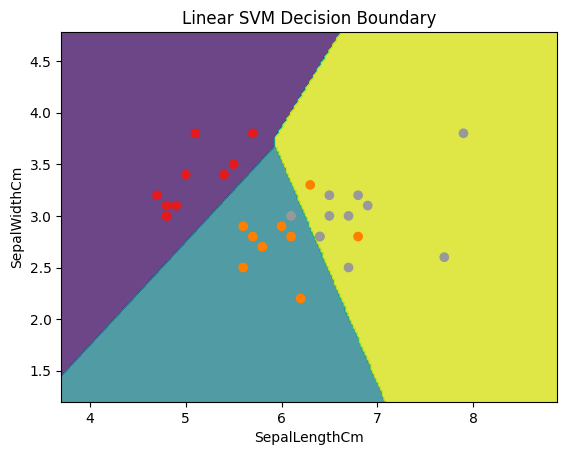

----------------------------------------
Confusion Matrix (rbf kernel):
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report (rbf kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


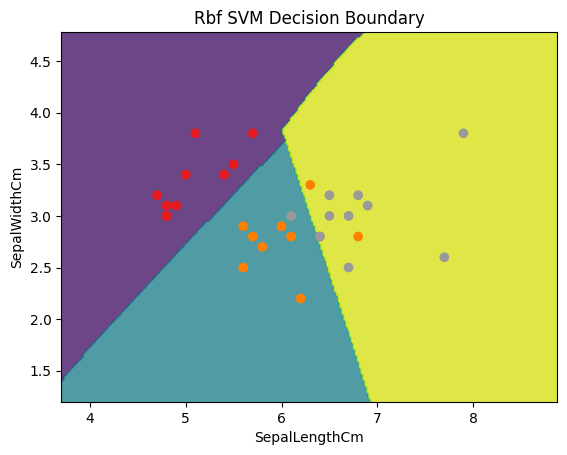

----------------------------------------
Confusion Matrix (poly kernel):
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]

Classification Report (poly kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


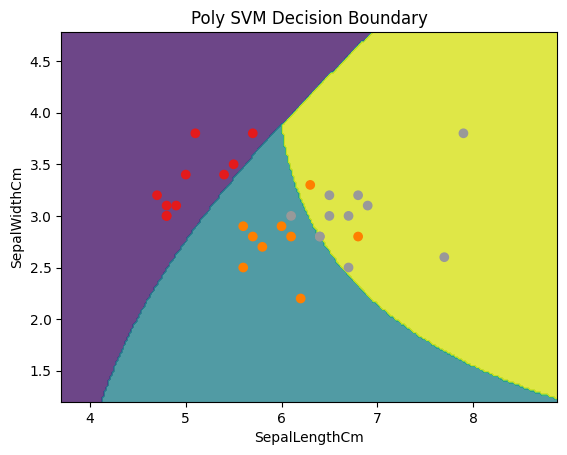

----------------------------------------


In [7]:
# Define the kernel names and corresponding kernel classes
kernels = ['linear', 'rbf', 'poly']
kernel_classes = [SVC(kernel='linear'), SVC(kernel='rbf'), SVC(kernel='poly')]

# Loop over the kernels
for kernel_name, kernel_class in zip(kernels, kernel_classes):
    # Perform classification using the current kernel
    classifier = kernel_class
    classifier.fit(X_train, y_train)

    # Generate predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print the confusion matrix
    print(f"Confusion Matrix ({kernel_name} kernel):")
    print(confusion_matrix(y_test, y_pred))
    print()

    # Calculate and print the classification report (including precision, recall, and F1-score)
    print(f"Classification Report ({kernel_name} kernel):")
    print(classification_report(y_test, y_pred))
    print()

    # Function to plot the decision boundaries
    def plot_decision_boundary(X, y, classifier):
        h = 0.02  # step size in the mesh

        # Create a mesh grid of points
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Make predictions for each point in the mesh grid
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the contour lines and data points
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
        plt.xlabel('SepalLengthCm')
        plt.ylabel('SepalWidthCm')
        plt.title(f'{kernel_name.capitalize()} SVM Decision Boundary')
        plt.show()

    # Plot the decision boundaries
    plot_decision_boundary(X_test, y_test, classifier)
    print('-' * 40)

Gamma: 0.1, Regularization (C): 0.1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0 10  1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.47      1.00      0.64         9
           2       1.00      0.09      0.17        11

    accuracy                           0.67        30
   macro avg       0.82      0.70      0.60        30
weighted avg       0.84      0.67      0.59        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


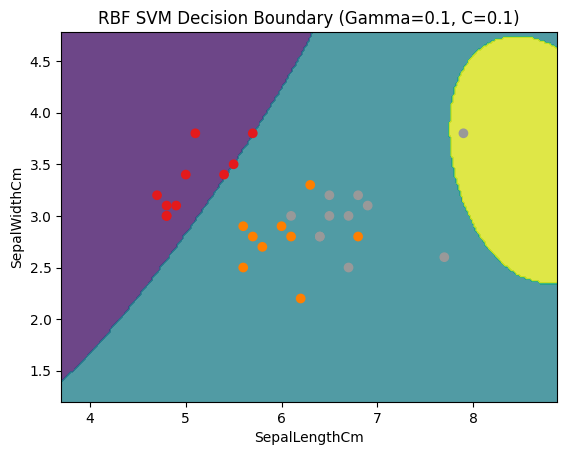

----------------------------------------
Gamma: 0.1, Regularization (C): 1
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


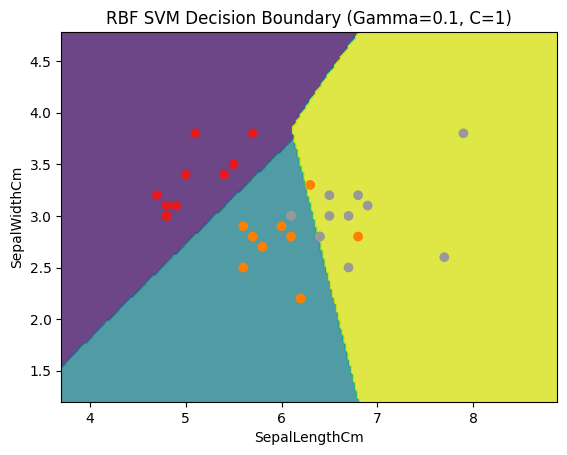

----------------------------------------
Gamma: 0.1, Regularization (C): 10
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


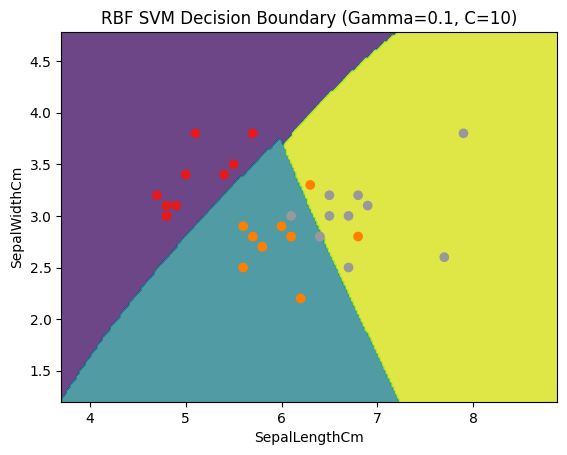

----------------------------------------
Gamma: 1, Regularization (C): 0.1
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


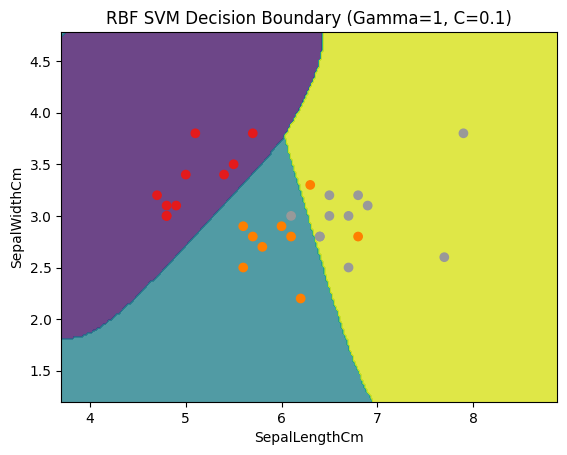

----------------------------------------
Gamma: 1, Regularization (C): 1
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


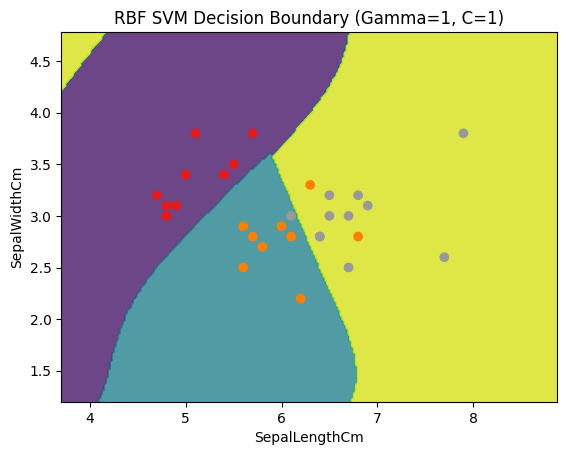

----------------------------------------
Gamma: 1, Regularization (C): 10
Confusion Matrix:
[[10  0  0]
 [ 0  6  3]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.67      0.75         9
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


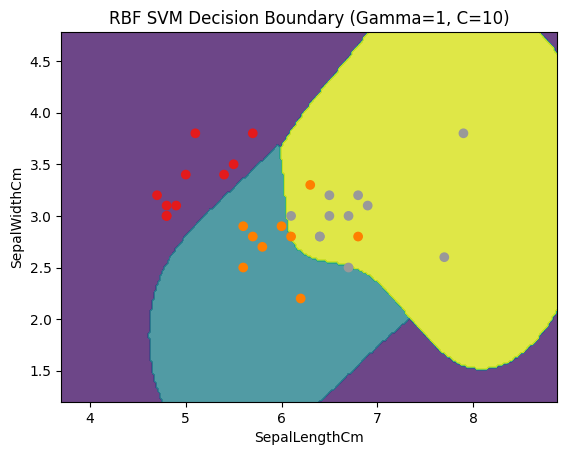

----------------------------------------
Gamma: 10, Regularization (C): 0.1
Confusion Matrix:
[[ 9  1  0]
 [ 0  9  0]
 [ 0 11  0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.43      1.00      0.60         9
           2       0.00      0.00      0.00        11

    accuracy                           0.60        30
   macro avg       0.48      0.63      0.52        30
weighted avg       0.46      0.60      0.50        30




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: Use

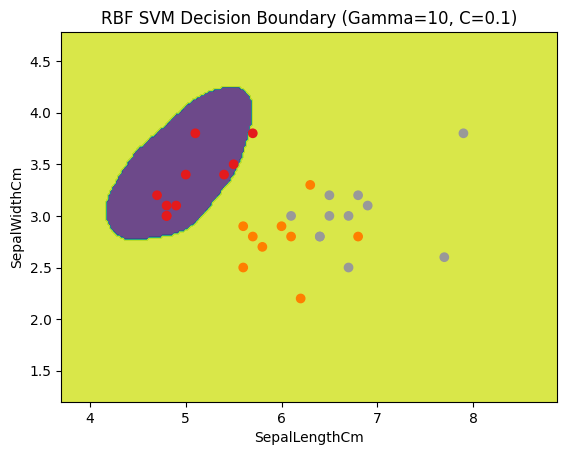

----------------------------------------
Gamma: 10, Regularization (C): 1
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.89      0.76         9
           2       0.88      0.64      0.74        11

    accuracy                           0.83        30
   macro avg       0.85      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


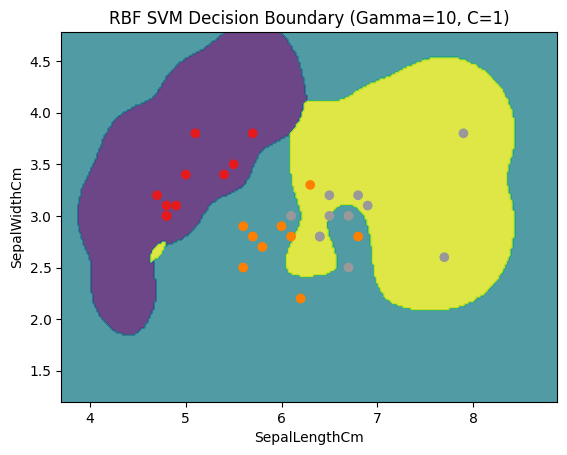

----------------------------------------
Gamma: 10, Regularization (C): 10
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  3  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


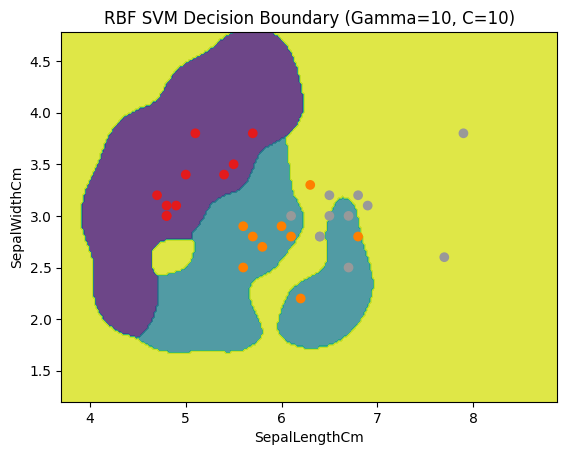

----------------------------------------


In [8]:
# Define the gamma and C values
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]

# Perform classification using the rbf kernel with different gamma and C values
for gamma in gamma_values:
    for C in C_values:
        print(f"Gamma: {gamma}, Regularization (C): {C}")

        # Create the classifier with the current gamma and C values
        classifier = SVC(kernel='rbf', gamma=gamma, C=C)
        classifier.fit(X_train, y_train)

        # Generate predictions
        y_pred = classifier.predict(X_test)

        # Calculate and print the confusion matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print()

        # Calculate and print the classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print()

        # Function to plot the decision boundaries
        def plot_decision_boundary(X, y, classifier):
            h = 0.02  # step size in the mesh

            # Create a mesh grid of points
            x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
            y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Make predictions for each point in the mesh grid
            Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot the contour lines and data points
            plt.contourf(xx, yy, Z, alpha=0.8)
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
            plt.xlabel('SepalLengthCm')
            plt.ylabel('SepalWidthCm')
            plt.title(f'RBF SVM Decision Boundary (Gamma={gamma}, C={C})')
            plt.show()

        # Plot the decision boundaries
        plot_decision_boundary(X_test, y_test, classifier)
        print('-' * 40)

Best Parameters:
{'C': 1, 'gamma': 0.1}

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


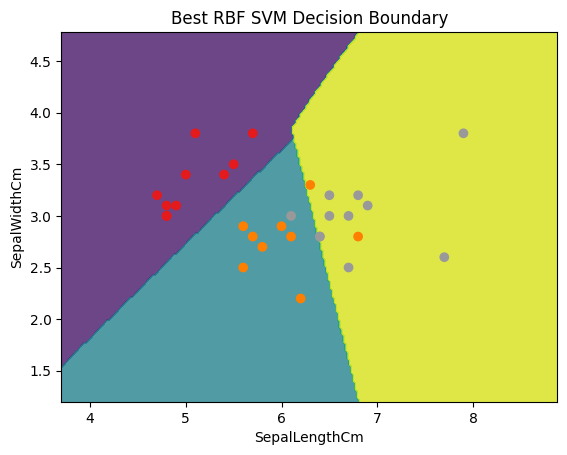

In [9]:
# Define the parameter grid for GridSearchCV
#param_grid = {'gamma': np.arange(0, 10, 0.5), 'C': np.arange(0, 20, 0.1)}
param_grid = {'gamma': [0.1, 1, 10], 'C': [0.1, 1, 10]}
# Create the classifier
classifier = SVC(kernel='rbf')

# Perform grid search to find the best parameters
grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)
print()

# Generate predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

# Function to plot the decision boundaries
def plot_decision_boundary(X, y, classifier):
    h = 0.02  # step size in the mesh

    # Create a mesh grid of points
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour lines and data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.title('Best RBF SVM Decision Boundary')
    plt.show()

# Plot the decision boundaries for the best model
plot_decision_boundary(X_test, y_test, best_model)

Kernel: rbf, Approach: ovr
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


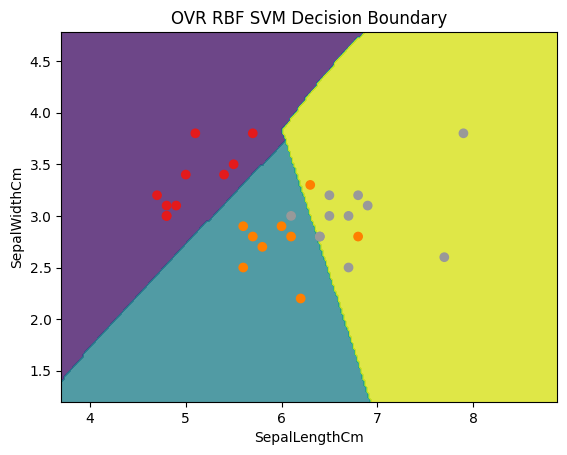

----------------------------------------
Kernel: rbf, Approach: ovo
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


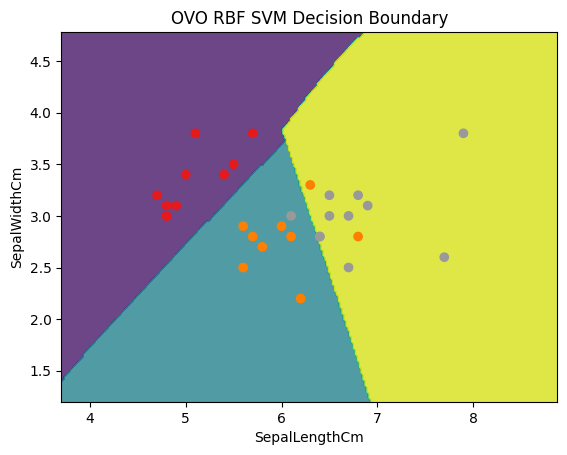

----------------------------------------
Kernel: linear, Approach: ovr
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


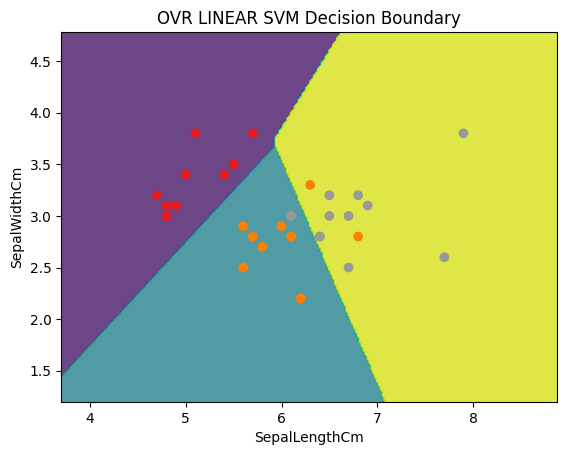

----------------------------------------
Kernel: linear, Approach: ovo
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


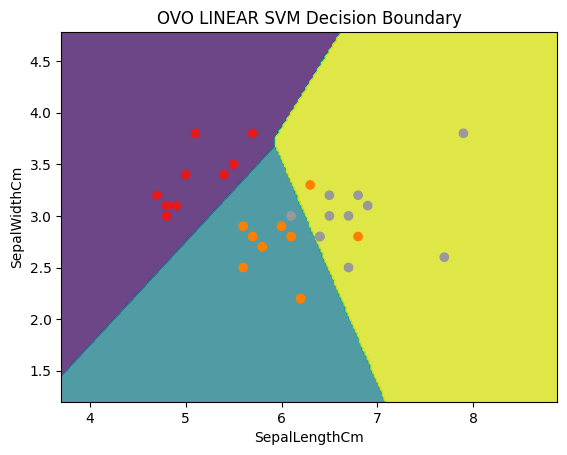

----------------------------------------
Kernel: poly, Approach: ovr
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


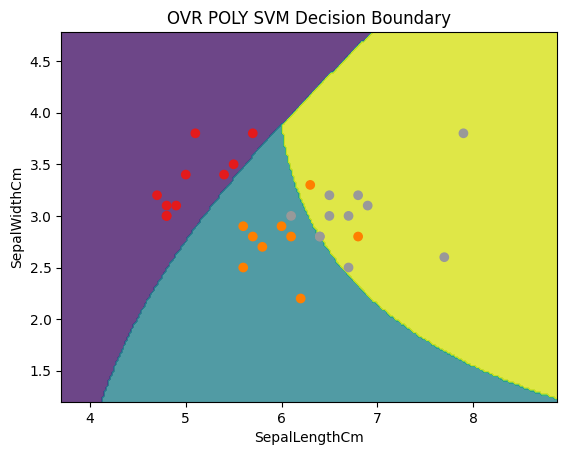

----------------------------------------
Kernel: poly, Approach: ovo
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


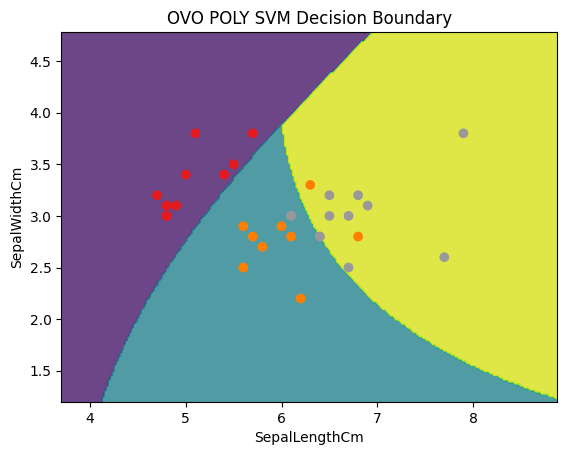

----------------------------------------


In [10]:
# Define the kernels and approaches
kernels = ['rbf', 'linear', 'poly']
approaches = ['ovr', 'ovo']

# Perform classification for each kernel and approach
for kernel in kernels:
    for approach in approaches:
        print(f"Kernel: {kernel}, Approach: {approach}")

        # Create the classifier with the current kernel and approach
        classifier = SVC(kernel=kernel, degree=3, decision_function_shape=approach)
        classifier.fit(X_train, y_train)

        # Generate predictions
        y_pred = classifier.predict(X_test)

        # Calculate and print the confusion matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print()

        # Calculate and print the classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print()

        # Function to plot the decision boundaries
        def plot_decision_boundary(X, y, classifier):
            h = 0.02  # step size in the mesh

            # Create a mesh grid of points
            x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
            y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Make predictions for each point in the mesh grid
            Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot the contour lines and data points
            plt.contourf(xx, yy, Z, alpha=0.8)
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
            plt.xlabel('SepalLengthCm')
            plt.ylabel('SepalWidthCm')
            plt.title(f'{approach.upper()} {kernel.upper()} SVM Decision Boundary')
            plt.show()

        # Plot the decision boundaries
        plot_decision_boundary(X_test, y_test, classifier)
        print('-' * 40)

**Use Second two Features - Petal**

In [11]:
#remove first two feature 
iris_data_2 = iris_data.drop(['Id', 'SepalLengthCm' , "SepalWidthCm"], axis=1)

In [12]:
iris_data_2.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [13]:
# Encode Lable 
le = LabelEncoder()
iris_data_2['Species'] = le.fit_transform(iris_data_2['Species'])

In [14]:
iris_data_2.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [15]:
# split data to X , Y 
X = iris_data_2.drop('Species', axis=1)
y = iris_data_2['Species']

In [16]:
# Split Data to Train and Test  ( 80% train 20% test )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix (linear kernel):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (linear kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


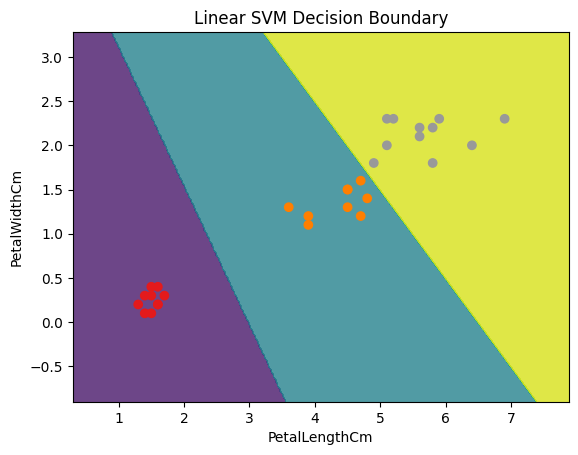

----------------------------------------
Confusion Matrix (rbf kernel):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (rbf kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


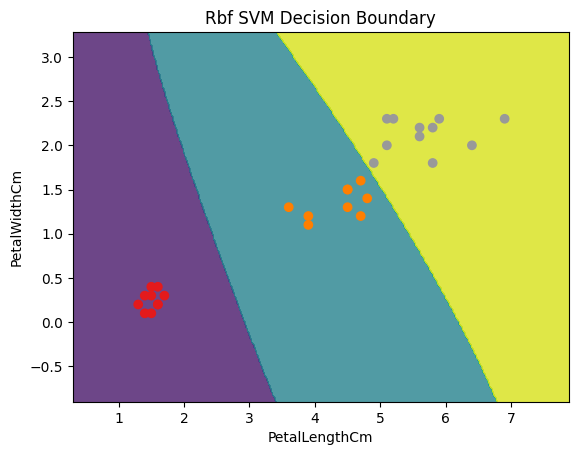

----------------------------------------
Confusion Matrix (poly kernel):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (poly kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


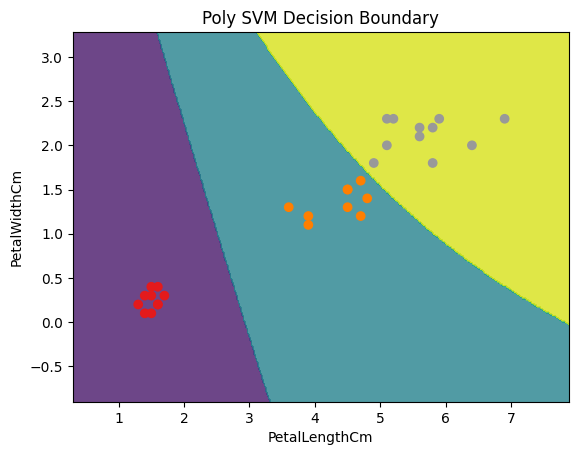

----------------------------------------


In [17]:
# Define the kernel names and corresponding kernel classes
kernels = ['linear', 'rbf', 'poly']
kernel_classes = [SVC(kernel='linear'), SVC(kernel='rbf'), SVC(kernel='poly')]

# Loop over the kernels
for kernel_name, kernel_class in zip(kernels, kernel_classes):
    # Perform classification using the current kernel
    classifier = kernel_class
    classifier.fit(X_train, y_train)

    # Generate predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print the confusion matrix
    print(f"Confusion Matrix ({kernel_name} kernel):")
    print(confusion_matrix(y_test, y_pred))
    print()

    # Calculate and print the classification report (including precision, recall, and F1-score)
    print(f"Classification Report ({kernel_name} kernel):")
    print(classification_report(y_test, y_pred))
    print()

    # Function to plot the decision boundaries
    def plot_decision_boundary(X, y, classifier):
        h = 0.02  # step size in the mesh

        # Create a mesh grid of points
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Make predictions for each point in the mesh grid
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the contour lines and data points
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
        plt.xlabel('PetalLengthCm')
        plt.ylabel('PetalWidthCm')
        plt.title(f'{kernel_name.capitalize()} SVM Decision Boundary')
        plt.show()

    # Plot the decision boundaries
    plot_decision_boundary(X_test, y_test, classifier)
    print('-' * 40)

In [18]:
### Gamma and Regularization Hyper Parametre in RBF

Gamma: 0.1, Regularization (C): 0.1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


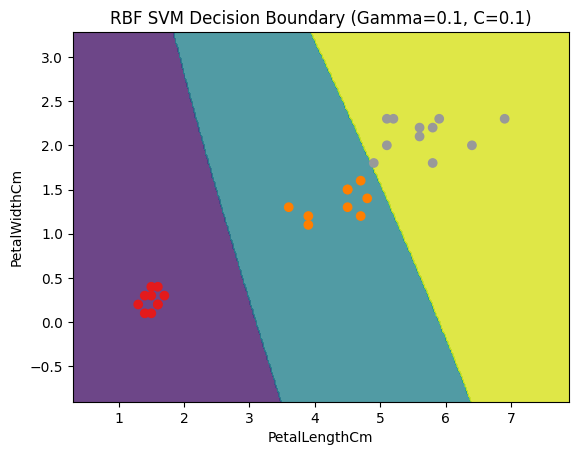

----------------------------------------
Gamma: 0.1, Regularization (C): 1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


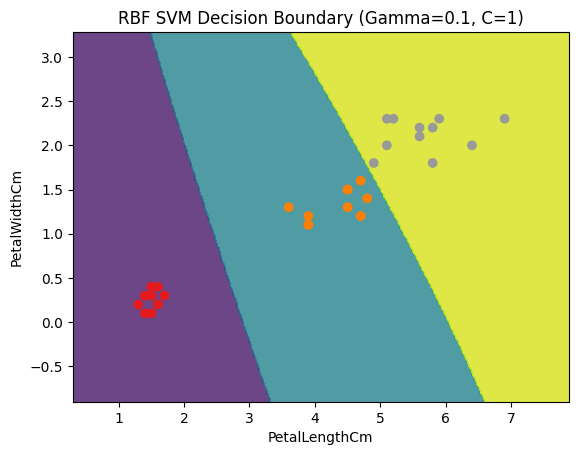

----------------------------------------
Gamma: 0.1, Regularization (C): 10
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


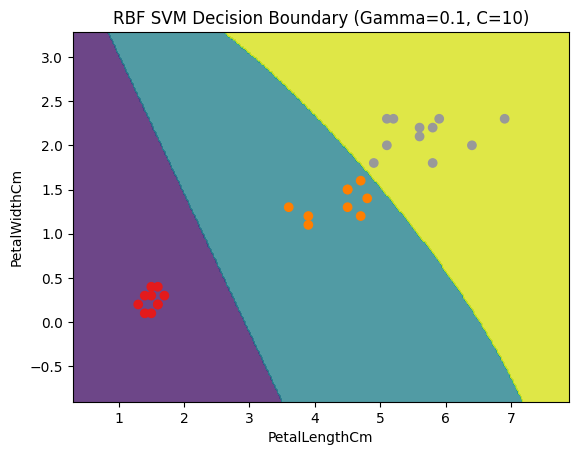

----------------------------------------
Gamma: 1, Regularization (C): 0.1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


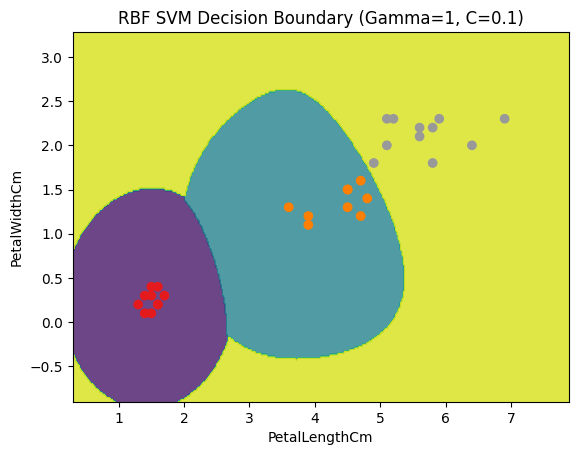

----------------------------------------
Gamma: 1, Regularization (C): 1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


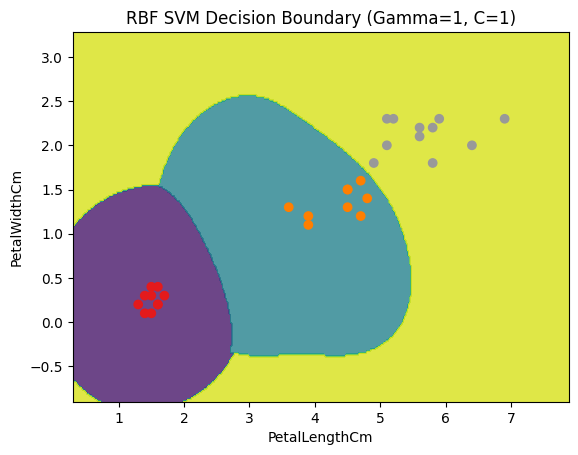

----------------------------------------
Gamma: 1, Regularization (C): 10
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


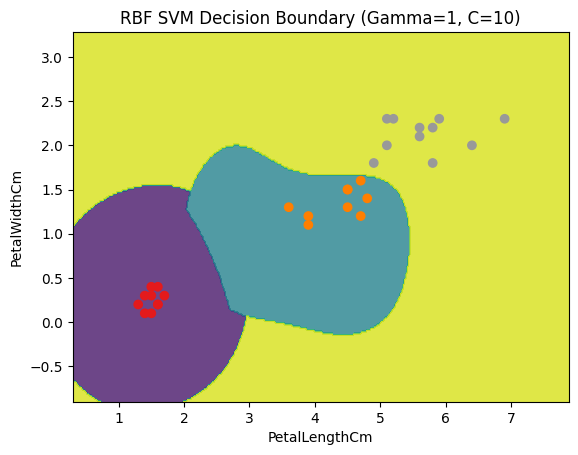

----------------------------------------
Gamma: 10, Regularization (C): 0.1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


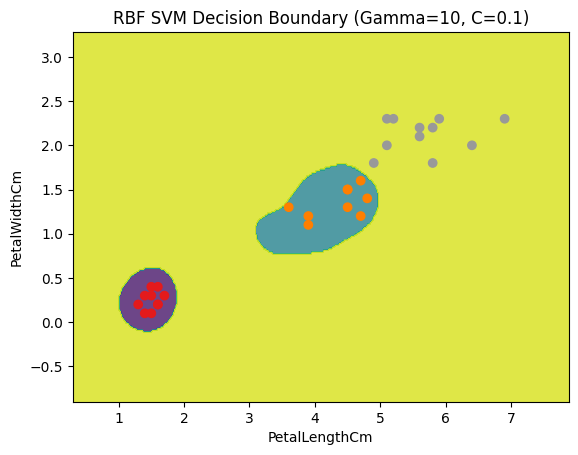

----------------------------------------
Gamma: 10, Regularization (C): 1
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


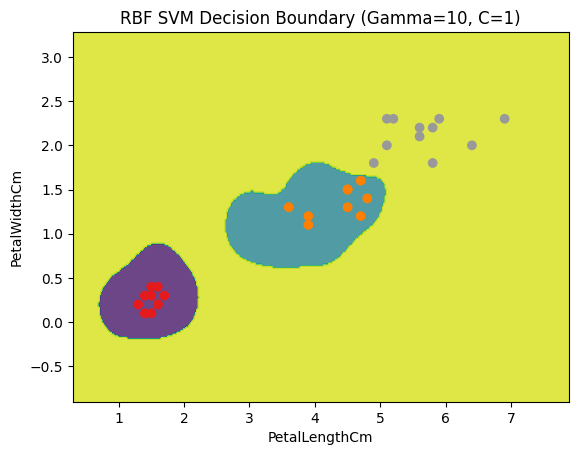

----------------------------------------
Gamma: 10, Regularization (C): 10
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


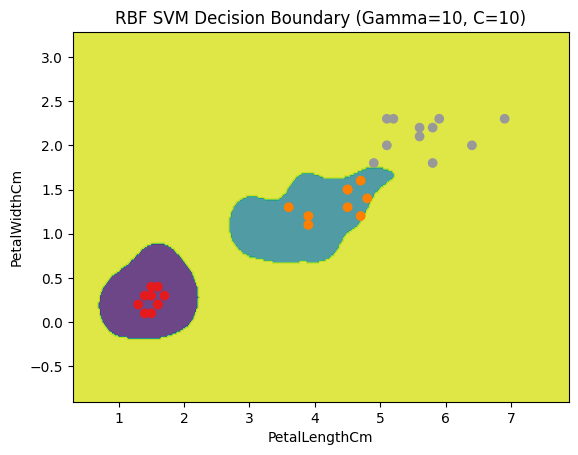

----------------------------------------


In [19]:
# Define the gamma and C values
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10]

# Perform classification using the rbf kernel with different gamma and C values
for gamma in gamma_values:
    for C in C_values:
        print(f"Gamma: {gamma}, Regularization (C): {C}")

        # Create the classifier with the current gamma and C values
        classifier = SVC(kernel='rbf', gamma=gamma, C=C)
        classifier.fit(X_train, y_train)

        # Generate predictions
        y_pred = classifier.predict(X_test)

        # Calculate and print the confusion matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print()

        # Calculate and print the classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print()

        # Function to plot the decision boundaries
        def plot_decision_boundary(X, y, classifier):
            h = 0.02  # step size in the mesh

            # Create a mesh grid of points
            x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
            y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Make predictions for each point in the mesh grid
            Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot the contour lines and data points
            plt.contourf(xx, yy, Z, alpha=0.8)
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
            plt.xlabel('PetalLengthCm')
            plt.ylabel('PetalWidthCm')
            plt.title(f'RBF SVM Decision Boundary (Gamma={gamma}, C={C})')
            plt.show()

        # Plot the decision boundaries
        plot_decision_boundary(X_test, y_test, classifier)
        print('-' * 40)

****

Best Parameters:
{'C': 1, 'gamma': 0.1}

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


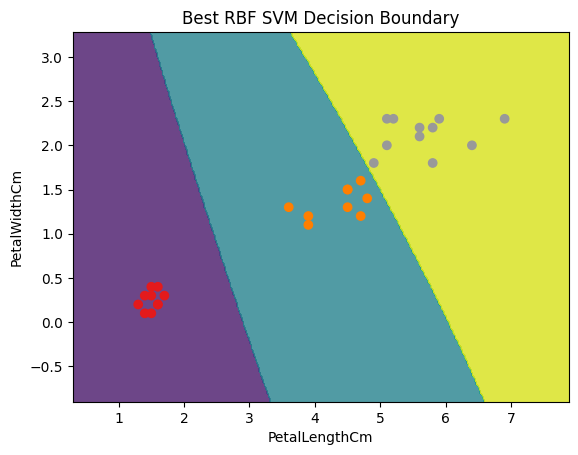

In [20]:
# Define the parameter grid for GridSearchCV
#param_grid = {'gamma': np.arange(0, 10.05, 0.5), 'C': np.arange(0, 100.1, 1)}
param_grid = {'gamma': [0.1, 1, 10], 'C': [0.1, 1, 10]}
# Create the classifier
classifier = SVC(kernel='rbf')

# Perform grid search to find the best parameters
grid_search = GridSearchCV(classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)
print()

# Generate predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

# Function to plot the decision boundaries
def plot_decision_boundary(X, y, classifier):
    h = 0.02  # step size in the mesh

    # Create a mesh grid of points
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour lines and data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.title('Best RBF SVM Decision Boundary')
    plt.show()

# Plot the decision boundaries for the best model
plot_decision_boundary(X_test, y_test, best_model)

Kernel: rbf, Approach: ovr
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


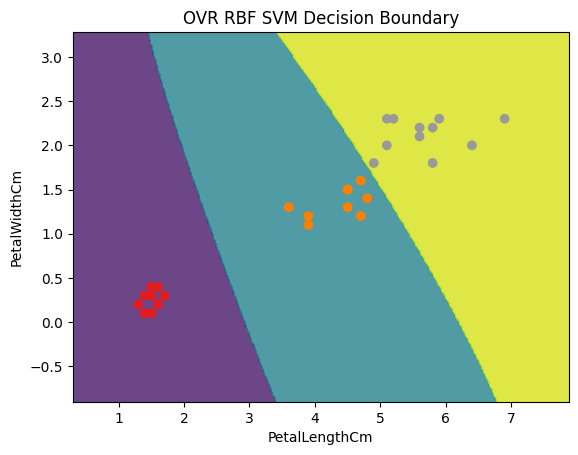

----------------------------------------
Kernel: rbf, Approach: ovo
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


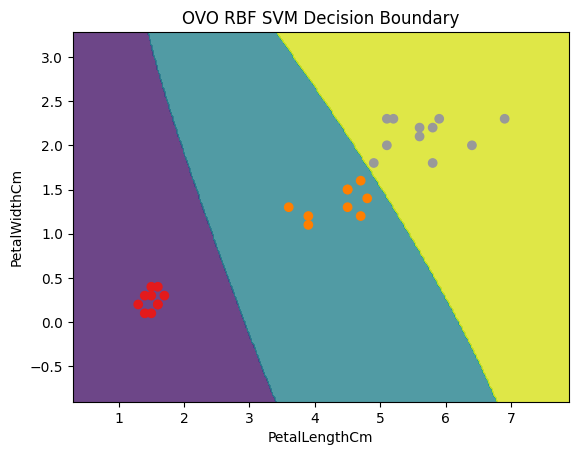

----------------------------------------
Kernel: linear, Approach: ovr
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


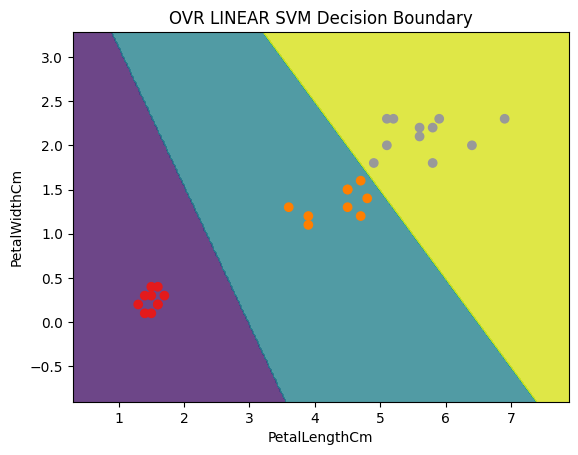

----------------------------------------
Kernel: linear, Approach: ovo
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


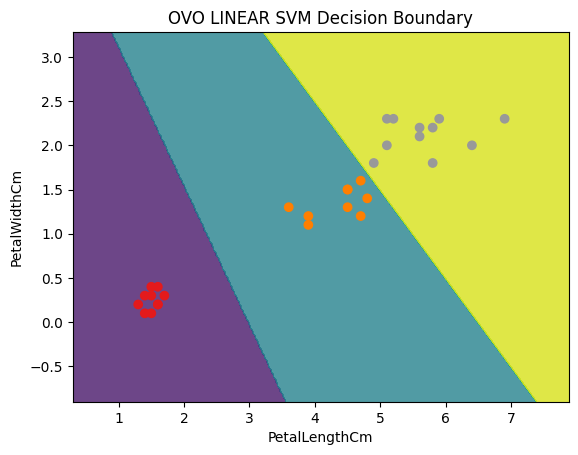

----------------------------------------
Kernel: poly, Approach: ovr
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


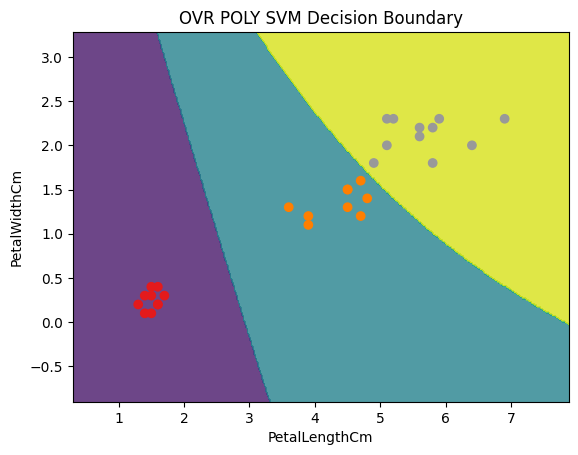

----------------------------------------
Kernel: poly, Approach: ovo
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


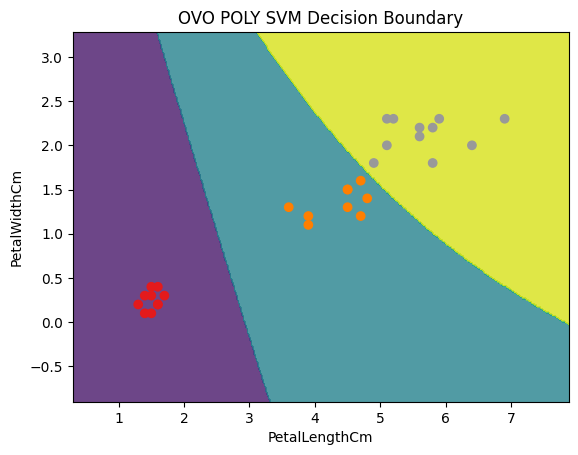

----------------------------------------


In [21]:
# Define the kernels and approaches
kernels = ['rbf', 'linear', 'poly']
approaches = ['ovr', 'ovo']

# Perform classification for each kernel and approach
for kernel in kernels:
    for approach in approaches:
        print(f"Kernel: {kernel}, Approach: {approach}")

        # Create the classifier with the current kernel and approach
        classifier = SVC(kernel=kernel, degree=3, decision_function_shape=approach)
        classifier.fit(X_train, y_train)

        # Generate predictions
        y_pred = classifier.predict(X_test)

        # Calculate and print the confusion matrix
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print()

        # Calculate and print the classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print()

        # Function to plot the decision boundaries
        def plot_decision_boundary(X, y, classifier):
            h = 0.02  # step size in the mesh

            # Create a mesh grid of points
            x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
            y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Make predictions for each point in the mesh grid
            Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Plot the contour lines and data points
            plt.contourf(xx, yy, Z, alpha=0.8)
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1)
            plt.xlabel('PetalLengthCm')
            plt.ylabel('PetalWidthCm')
            plt.title(f'{approach.upper()} {kernel.upper()} SVM Decision Boundary')
            plt.show()

        # Plot the decision boundaries
        plot_decision_boundary(X_test, y_test, classifier)
        print('-' * 40)